In [1]:
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
from tqdm import tqdm

In [3]:
#pd.read_csv("coauth-MAG-Geology-node-labels.txt", on_bad_lines='skip', header = None)

In [4]:
#pd.read_csv("coauth-MAG-Geology-simplex-labels.txt", on_bad_lines='skip', header = None, sep = "\t")

In [104]:
with open(r'../Dataset/dataframe.pkl', 'rb') as f:
    df = pk.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../Dataset/dataframe.pkl'

In [6]:
df["Size"] = df["Simplices"].apply(lambda x : len(x))

In [7]:
df.head()

,Time,Simplices,Size
0,1987.0,[1.0],1
1,2007.0,[2.0],1
2,2011.0,"[4.0, 3.0]",2
3,1998.0,[5.0],1
4,1985.0,"[7.0, 8.0, 6.0]",3


In [8]:
df.groupby("Time").count().iloc[80:100]

,Simplices,Size
Time,,
1893.0,184,184
1894.0,204,204
1895.0,155,155
1896.0,208,208
1897.0,174,174
1898.0,168,168
1899.0,172,172
1900.0,280,280
1901.0,146,146


In [42]:
y1 = 2000
y2 = 2001
size_max = 21
size_min = 6

In [44]:
l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
len(l2)

2960

In [46]:
over = np.zeros((len(l1),len(l2)))
inclusion = np.zeros((len(l1),len(l2)))

In [47]:
def overlap_size(a,b):
    return len(a & b)/len(a | b)

In [48]:
def inclusion_size(a,b):
    if b.issubset(a):
        return len(b) - len(a)
    elif a.issubset(b):
        return len(b) - len(a)
    else:
        return np.nan

In [49]:
inclusion_size({1,2,3,4},{1,2,3})

-1

In [50]:
len(l1)

2295

In [51]:
len(l1)*len(l2)

6793200

In [129]:
dict_inc = {}
dict_over = {}

for y1 in tqdm(range(1950,2011,10), total = len(range(1880,2011,20))):
    print(y1)
    y2 = y1+1
    l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    over = np.zeros((len(l1),len(l2)))
    inclusion = np.zeros((len(l1),len(l2)))

    for i, s1 in enumerate(l1):
        for j, s2 in enumerate(l2):
            over[i][j] = overlap_size(set(s1),set(s2))
            inclusion[i][j] = inclusion_size(set(s1),set(s2))
    dict_inc[str(y1)] = inclusion
    dict_over[str(y1)] = over

 43%|███████████████████▎                         | 3/7 [00:00<00:00, 26.39it/s]

1950
1960
1970
1980
1990
2000


 86%|██████████████████████████████████████▌      | 6/7 [00:35<00:06,  6.93s/it]

2010


100%|█████████████████████████████████████████████| 7/7 [06:57<00:00, 59.65s/it]


In [53]:
#sns.heatmap(over)

In [130]:
np.count_nonzero(~np.isnan(dict_inc["2000"]))

78

In [74]:
#or index, i in enumerate(range(-5,6,1)):
    #print(str(i) + " : " + str(np.count_nonzero(inclusion == i)))
    #y[index] = int(np.count_nonzero(inclusion == i))

In [127]:
#sns.color_palette("pastel")
cols = sns.color_palette()

In [ ]:
for i, y1 in enumerate(range(1950,2011,10)):    
    inc_flat = dict_inc[str(y1)].flatten()
    sns.histplot(inc_flat, kde = True, bins = np.array(range(size_min - size_max, size_max - size_min))- 0.5, 
                 stat = "probability", label = str(y1), color = cols[i], alpha = 0.5)
plt.legend()

/home/christel/anaconda3/lib/python3.9/site-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()
/home/christel/anaconda3/lib/python3.9/site-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()


In [99]:
np.array(range(size_min - size_max, size_max - size_min))- 0.5

array([-15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,
        -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,   1.5,
         2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,
        11.5,  12.5,  13.5])

In [88]:
size_min - size_max

-15

<AxesSubplot:>

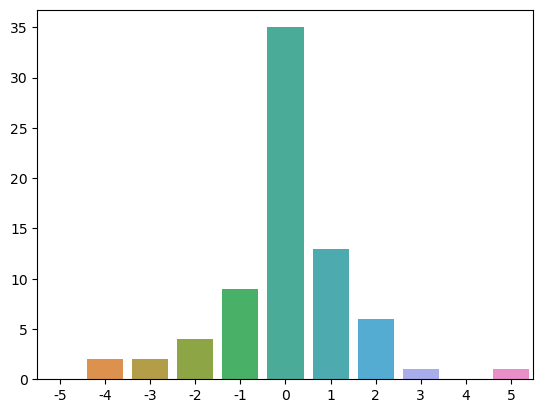

In [82]:
sns.barplot(x=x, y=y)
#plt.yscale("log")

In [70]:
np.where(over==0.5)

(array([ 17,  77,  77, 113, 116, 116, 121, 121, 164, 186, 196, 200, 200,
        276]),
 array([ 94,   8, 136,  44, 134, 137,   8, 136,  66,  96,  94,   8, 136,
        120]))

In [71]:
l1[17]

[204804.0, 204803.0]

In [72]:
l2[94]

[204803.0]

In [56]:
over[over==0]

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
np.count_nonzero(over)

63